# Modeling (Scikit-Learn) Exercise

<hr>

## Part 1

Install scikit learn if you have not yet done so!

In [175]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
    

### Import some libraries first

In [176]:
import pandas as pd # for working with data
import numpy as np # for working with data
import seaborn as sns # for making visualizations
from matplotlib import pyplot as plt # for making visualizations

## Load our data  

We are going to work with some mushroom data to classify if something is poisonous or not. Remember this from the python exercise? Instead of figuring out those if statements ourselves, we will have a model (specifically, decision trees) do it for us!

<img src="
https://cdn.shopify.com/s/files/1/0043/8439/1239/products/Cortina-KeychainPlush_1024x1024@2x.jpg?v=1630692639" alt="drawing" width="200"/>

In [177]:
mushrooms = [
    {"cap_diameter": 15, "cap_color": "purple", "stem_width": 2, "has_skull":True, 'poisonous':True},
    {"cap_diameter": 25, "cap_color": "orange", "stem_width": 5, "has_skull":True, 'poisonous':True},
    {"cap_diameter": 3, "cap_color": "green", "stem_width": 6, "has_skull":False, 'poisonous':False},
    {"cap_diameter": 8, "cap_color": "green", "stem_width": 3, "has_skull":False, 'poisonous':False},
    {"cap_diameter": 55, "cap_color": "green", "stem_width": 35, "has_skull":False, 'poisonous':True},
    {"cap_diameter": 7, "cap_color": "purple", "stem_width": 6, "has_skull":False, 'poisonous':True},
    {"cap_diameter": 3, "cap_color": "purple", "stem_width": 8, "has_skull":True, 'poisonous':True},
    {"cap_diameter": 35, "cap_color": "green", "stem_width": 4, "has_skull":False, 'poisonous':True},
    {"cap_diameter": 23, "cap_color": "green", "stem_width": 5, "has_skull":False, 'poisonous':False}
]

In the python exercise, we used a dictionary as our 'mushroom data.' Let's convert this now to a DataFrame.

In [178]:
df = pd.DataFrame(mushrooms)

In [179]:
df

,cap_diameter,cap_color,stem_width,has_skull,poisonous
0,15,purple,2,True,True
1,25,orange,5,True,True
2,3,green,6,False,False
3,8,green,3,False,False
4,55,green,35,False,True
5,7,purple,6,False,True
6,3,purple,8,True,True
7,35,green,4,False,True
8,23,green,5,False,False


## Understand our data

Changing the color palettes for fun. :)  
More info on palettes: https://seaborn.pydata.org/tutorial/color_palettes.html?highlight=palette

In [180]:
sns.set_theme(palette="Accent")

In [181]:
# xkcd style :) 
sns.set_style('white')
plt.xkcd();

### Do we have any nulls to deal with?

<font color="red">TODO: Check for nulls. How many nulls (if any) do we have?</font>

In [182]:
null_values = df.isnull().sum()
print(f'null value count: {null_values}')

null value count: cap_diameter    0
cap_color       0
stem_width      0
has_skull       0
poisonous       0
dtype: int64


Nope! This is a super small dataset.

### Do we have a balanced dataset?   
Check how many items of each class (poisonous or not) we have. Is it balanced (meaning, is it close having 50% for each class)?

<font color="red">TODO: Create a countplot of our `poisonous` column</font>

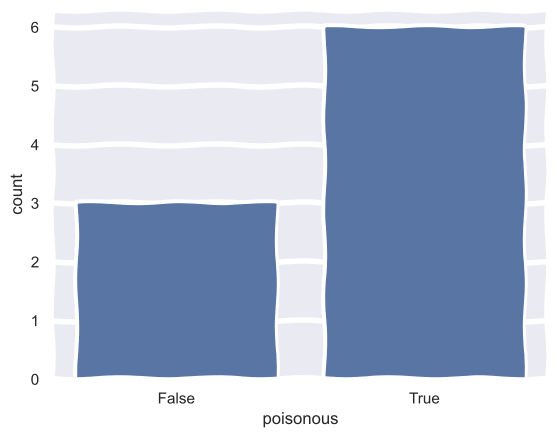

In [183]:
# TODO. Do something to answer this question. 
# A visualization or describing the data in some way (don't just manually count though!)
sns.set(font='Arial') # I was getting errors with some fonts not being found on my mac
sns.countplot(x='poisonous', data=df)
plt.show()

Not really. We will have to keep this in mind later when evaluating our model.

### Is there a split among any of the features?  Which features seem useful for predicting our target value (poisonous)?

Here is an example.

<Axes: xlabel='cap_color', ylabel='count'>

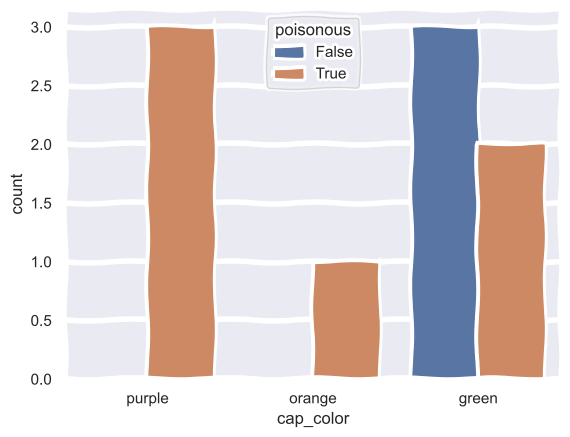

In [184]:
sns.countplot(x = 'cap_color', data=df, hue = 'poisonous')

Since the purple and orange cap colors are 100% for the poisonous class, this may be a helpful feature for classifying our mushrooms into poisonous or not.

<font color="red">TODO: Now try checking some other features on your own. Which features seem like they may be useful? What visualizations can be made to help you gain and understand of which features may be more relevant? </font>

<Axes: xlabel='has_skull', ylabel='count'>

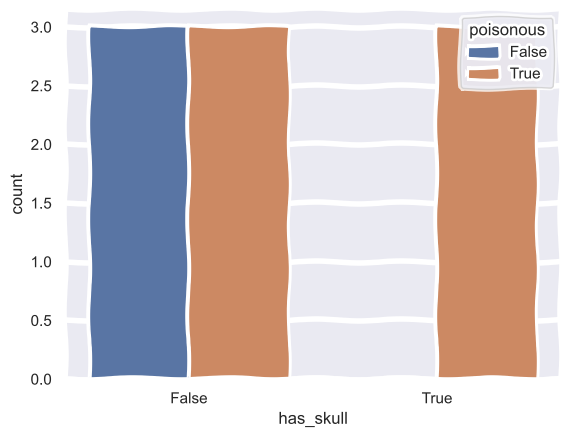

In [185]:
#TODO
sns.countplot(x = 'has_skull', data=df, hue = 'poisonous')

## Pre-processing: Preparing for our modeling  
First, let's check the datatypes of our columns.

In [186]:
df.dtypes

cap_diameter     int64
cap_color       object
stem_width       int64
has_skull         bool
poisonous         bool
dtype: object

We have ints, a string, and some booleans. We need to convert our string to numbers - something our model will be able to work with! 

<font color="red">Convert `cap_color` using `pd.get_dummies`. **Refer to the demo notebook for an example.**</font>

In [187]:
# TODO
dummies = pd.get_dummies(df['cap_color'], prefix='cap_color')
df = pd.concat([df, dummies], axis=1)
print(df)

   cap_diameter cap_color  stem_width  has_skull  poisonous  cap_color_green  \
0            15    purple           2       True       True            False   
1            25    orange           5       True       True            False   
2             3     green           6      False      False             True   
3             8     green           3      False      False             True   
4            55     green          35      False       True             True   
5             7    purple           6      False       True            False   
6             3    purple           8       True       True            False   
7            35     green           4      False       True             True   
8            23     green           5      False      False             True   

   cap_color_orange  cap_color_purple  
0             False              True  
1              True             False  
2             False             False  
3             False             False  

Our dataframe should now look like this. Use this (below) tho check your work.

In [188]:
df.head()

,cap_diameter,cap_color,stem_width,has_skull,poisonous,cap_color_green,cap_color_orange,cap_color_purple
0,15,purple,2,True,True,False,False,True
1,25,orange,5,True,True,False,True,False
2,3,green,6,False,False,True,False,False
3,8,green,3,False,False,True,False,False
4,55,green,35,False,True,True,False,False


### Set X (features) and y (target)  
<font color="red">TODO: Set our X and y values</font>

In [189]:
# TODO. Determine what is X (our features) and what is y (our target)
X = df[['cap_diameter', 'cap_color_green', 'cap_color_purple', 'cap_color_orange', 'stem_width', 'has_skull', 'poisonous']]
y = df['poisonous']

print(f'X features include {X}')
print(f'y target is {y}')

X features include    cap_diameter  cap_color_green  cap_color_purple  cap_color_orange  \
0            15            False              True             False   
1            25            False             False              True   
2             3             True             False             False   
3             8             True             False             False   
4            55             True             False             False   
5             7            False              True             False   
6             3            False              True             False   
7            35             True             False             False   
8            23             True             False             False   

   stem_width  has_skull  poisonous  
0           2       True       True  
1           5       True       True  
2           6      False      False  
3           3      False      False  
4          35      False       True  
5           6      False       T

Your X and y should look like the below. Use this to check yourself before moving onward.

In [190]:
X.shape, y.shape

((9, 7), (9,))

In [191]:
X

,cap_diameter,cap_color_green,cap_color_purple,cap_color_orange,stem_width,has_skull,poisonous
0,15,False,True,False,2,True,True
1,25,False,False,True,5,True,True
2,3,True,False,False,6,False,False
3,8,True,False,False,3,False,False
4,55,True,False,False,35,False,True
5,7,False,True,False,6,False,True
6,3,False,True,False,8,True,True
7,35,True,False,False,4,False,True
8,23,True,False,False,5,False,False


In [192]:
y

0     True
1     True
2    False
3    False
4     True
5     True
6     True
7     True
8    False
Name: poisonous, dtype: bool

### Split into train and test  
First, let's import what we need from scikit learn.

In [193]:
from sklearn.model_selection import train_test_split

<font color="red">TODO: Now write the line of code to get our `X_train`, `X_test`, `y_train` and `y_test` using only 20% of our data as the test size.</font>

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The shapes should look like the below. Use this to check yourself. Also note that our dataset is currently very small to begin with. The test subset will be even smaller.

In [195]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7, 7), (2, 7), (7,), (2,))

## Modeling!  
For the sake of this exercise, we will be working with decision trees. We will learn more about how they work next week.  

Again, we start by importing what we need from scikit learn.

In [196]:
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<font color="red">TODO: Create our decision tree classifier and fit it using our training dataset.</font>

In [197]:
# TODO

clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [198]:
# TODO


## Evaluate!

<font color="red">TODO: Use our classifier now to predict the target values of our testing dataset. </font>

In [199]:
# TODO
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [200]:
print(accuracy)
print(conf_matrix)
print(class_report)

1.0
[[2]]
              precision    recall  f1-score   support

        True       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



We got a 100% accuracy. Normally this would be incredibly suspicious... but given the tiny size of our dataset, this is OK (we will work with more data soon!).

<font color="red">TODO: Get the accuracy score.</font>

In [201]:
# TODO
print(accuracy)

1.0


Now let's visualize our tree so we can see what's going on! (Again, refer to the demo code for examples.)

In [202]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

<font color="red">TODO: Create a visualization of our decision tree.</font>

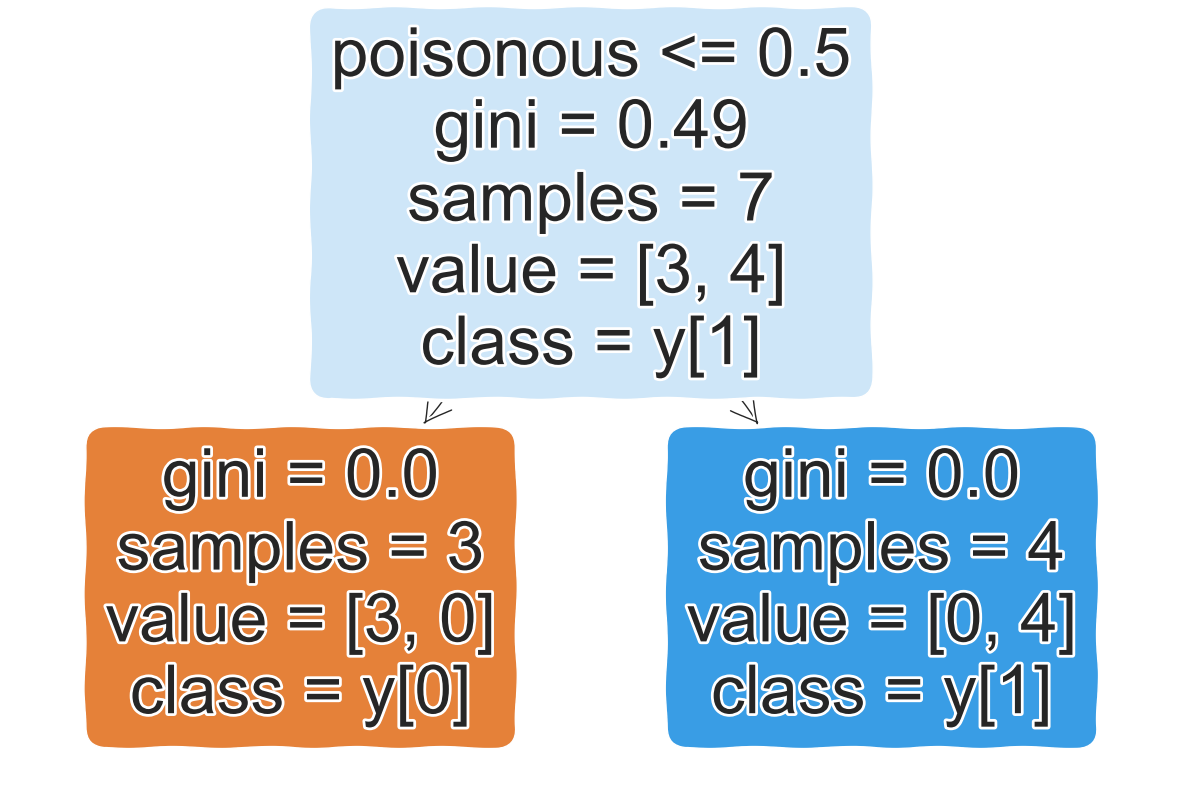

In [203]:
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
plt.show()

### Let's say we had a new mushroom...  
```new_mushroom = {"cap_diameter": 18, "cap_color": "orange", "stem_width": 7, "has_skull":True}```  
<font color="red">TODO: What would this new mushroom be classified as? Use the tree above to answer.</font>

yes

### What was the most important feature according to this decision tree?  What was the next most important feature?
<font color="red">TODO: Answer the question above and make a visualization. Refer to the demo!</font>

In [204]:
# TODO
# the most important feature was poisinous

<hr>

## Part 2
Now let's work with a larger dataset!

## Load the data

<font color="red">TODO: Read in your `mushroom.csv`</font>

In [206]:
df = pd.read_csv('mushrooms.csv')


It should look something like the following:

In [207]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [208]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## Data understanding and pre-processing

As just a quick check, we have no nulls to deal with:

In [209]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Moving on~

### Is out data balanced?  
<font color="red">TODO: Let's make the same countplot as a quick check! Our target value is now called `class` instead of `poisonous`.</font>

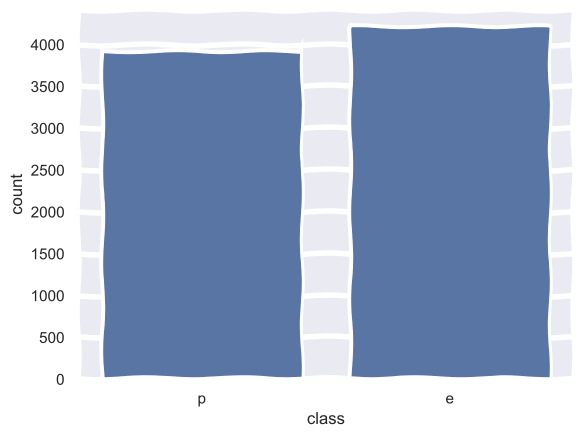

In [211]:
sns.countplot(x='class', data=df)
plt.show()

In [212]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

This looks rather balanced!

### Explore the data! Which features look relevant?  
<font color="red">TODO: Same as before! Go through and explore the data. Answer: which features look relevant and why (point to any visualizations you make)?</font>

### Convert feature datatypes  
Notice how *all* the columns are strings. We will need to convert these to integers now.

In [ ]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

<font color="red">TODO: Let's use `pd.get_dummies()` again. You will need to select all the columns except `class` (our target value).</font>

In [ ]:
# TODO


It should look like this once you are done (below). We have 119 columns now!

In [ ]:
df

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,e,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,e,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,p,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,e,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,e,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
8121,e,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,p,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


### Get our X and y
<font color="red">TODO: Now set our X (all the features) and y (just the class).

In [ ]:
# TODO


Here is what the `X` and `y` should look like.

In [ ]:
X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

### Split into training and testing sets  
<font color="red">TODO: Split into `X_train`, `X_test`, `y_train`, and `y_test` using 50% this time for the test size. </font>

In [ ]:
X_train, X_test, y_train, y_test = # TODO

The shapes should look like this:

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4062, 117), (4062,), (4062, 117), (4062,))

## Modeling!  
<font color="red">TODO: Now let's train our model!</font>

## Evaluating  
<font color="red">TODO: Now let's get the accuracy. Use the `score` method to do so.</font>

0.999507631708518

<font color="red">TODO: Plot that decision tree!</font>

<font color="red">TODO: Get and display the feature importances. Note: You will probably want to make the figure size longer/taller so it is easier to read. Discuss this. Which ones are most important? </font>

<font color="red">TODO: The basic accuracy (using `score` above) is a good place to start for evaluation. However, using the classification report gives us much more detail and a better overview of the performance.</font>

In [ ]:
from sklearn import metrics

In [ ]:
predicted = clf.predict(X_test)

In [ ]:
# TODO


              precision    recall  f1-score   support

           e       1.00      1.00      1.00      2120
           p       1.00      1.00      1.00      1942

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



We see that everything is quite high. This is likely because of the nature of our dataset

Now let's look at the **confusion matrix** too!

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
confusion_matrix(y_test, predicted)

array([[2120,    0],
       [   2, 1940]], dtype=int64)

In the above confusion matrix, the top left corner shows the mushrooms that were edible and correctly classified as edible. The bottom right corner shows mushrooms that were poisonous and correctly classified as poisonous. The bottom left shows those that were predicted as edible but were actually poisonous. And finally, the top right shows those that were predicted as poisonous but were actually edible.    

See the image below for a brief visual of a confusion matrix. In our case, positive = edible and negative = poisonous.

<img src="
https://i1.wp.com/dataaspirant.com/wp-content/uploads/2020/08/3_confusion_matrix.png?ssl=1" alt="drawing" width="800"/>


<font color="red">TODO: Answer the following. In this situation, which one is more dangerous: false positives (incorrectly predicted as edible) or false negatives (incorrectly predicted as poisonous). Explain why.